In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:

import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder



In [5]:
#https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset?resource=download
df = pd.read_csv("C:\\Users\\preet\\Documents\\MarketingAnalysis\\superstore_data.csv")

#print (df)

df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


### A store wants to attract new customers. They want to have three seperately tailored marketing camapigns for web, catalog, and store buyers. They want each campaign to be tailored to each of these three types of buyers. They also want a fourth campaign that will focus on broader based ads to target those who purchase the most from the company. From analyzing the traits and behavior from current customers we will be analyzing the data in order to find more insights into the type of prospective new customers we would be tailoring the campaign to for each of the marketing campaigns.

In [17]:
df.shape


(2240, 22)

### To better visualize the data we are going to calculate the age of the customers and make a new column that contains these values.


In [26]:
print(df['Year_Birth'])

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2235    1976
2236    1977
2237    1976
2238    1978
2239    1969
Name: Year_Birth, Length: 2240, dtype: int64


In [9]:
df['Age'] = 2024 - (df['Year_Birth'])

In [36]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0,34,2,3,1,2,7,1,0,35


### Create a sub-table to analyze the relationship between the age, if there are kids or teens at home with how the customer likes to purchase their products.

In [10]:
df_2 =df[['Age','Kidhome','Teenhome','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]

In [46]:
print (df_2)


      Age  Kidhome  Teenhome  NumWebPurchases  NumCatalogPurchases  \
0      54        0         0                4                    4   
1      63        0         0                7                    3   
2      66        0         1                3                    2   
3      57        1         1                1                    0   
4      35        1         0                3                    1   
...   ...      ...       ...              ...                  ...   
2235   48        0         1                5                    2   
2236   47        1         0                1                    0   
2237   48        1         0                6                    1   
2238   46        0         0                5                    4   
2239   55        0         2                8                    5   

      NumStorePurchases  
0                     6  
1                     7  
2                     5  
3                     2  
4                     2  
...

### Running the correlation function to find the numeric correlations between the variables.

In [11]:
df_2.corr()

,Age,Kidhome,Teenhome,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Age,1.000000,-0.230176,0.352111,0.145040,0.121275,0.128272
Kidhome,-0.230176,1.000000,-0.036133,-0.361647,-0.502237,-0.499683
Teenhome,0.352111,-0.036133,1.000000,0.155500,-0.110769,0.050695
NumWebPurchases,0.145040,-0.361647,0.155500,1.000000,0.378376,0.502713
NumCatalogPurchases,0.121275,-0.502237,-0.110769,0.378376,1.000000,0.518738
NumStorePurchases,0.128272,-0.499683,0.050695,0.502713,0.518738,1.000000


<Axes: >

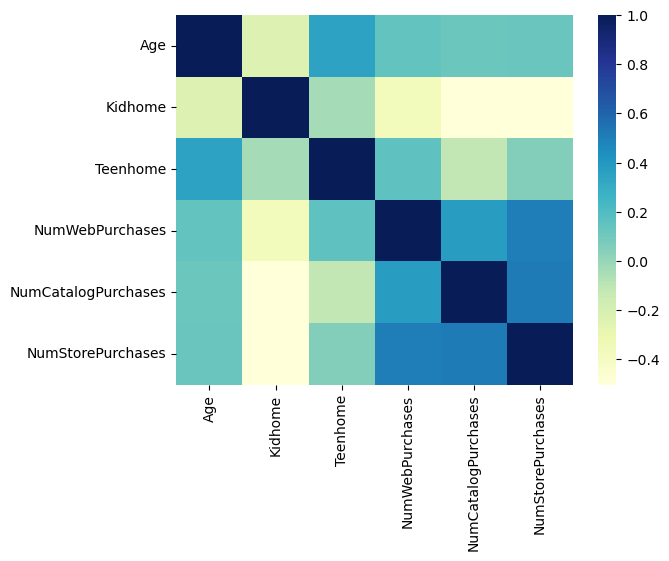

In [51]:
sns.heatmap(df_2.corr(),  cmap= "YlGnBu")

### It seems like if the customers have kids or teens they are more likely to purchase using the web. Those with kids have a negative correlation to using the store. Lets now try to put more variables to analyze the dataset further.

In [13]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

### Convert nominal data into ordinal data by encoding it

In [16]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output = False).set_output(transform= 'pandas')

In [17]:
ohetransform = ohe.fit_transform(df[['Education']])

In [18]:
ohetransform

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,1.0
2236,1.0,0.0,0.0,0.0,0.0
2237,0.0,0.0,1.0,0.0,0.0
2238,0.0,0.0,1.0,0.0,0.0


### Add the encoded nominal values to the original dataset

In [19]:
df = pd.concat([df,ohetransform], axis = 1)

In [20]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,6,1,1,0,54,0.0,0.0,1.0,0.0,0.0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,5,1,0,63,0.0,0.0,1.0,0.0,0.0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,5,2,0,0,66,0.0,0.0,1.0,0.0,0.0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,2,7,0,0,57,0.0,0.0,1.0,0.0,0.0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,2,7,1,0,35,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,11,4,0,0,48,0.0,0.0,0.0,0.0,1.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,0,0,47,1.0,0.0,0.0,0.0,0.0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,5,8,0,0,48,0.0,0.0,1.0,0.0,0.0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,10,3,0,0,46,0.0,0.0,1.0,0.0,0.0


In [21]:
df_3 =df[['Education_2n Cycle','Education_Basic','Education_Graduation','Education_Master','Education_PhD','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]

In [22]:
df_3

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0.0,0.0,1.0,0.0,0.0,4,4,6
1,0.0,0.0,1.0,0.0,0.0,7,3,7
2,0.0,0.0,1.0,0.0,0.0,3,2,5
3,0.0,0.0,1.0,0.0,0.0,1,0,2
4,0.0,0.0,1.0,0.0,0.0,3,1,2
...,...,...,...,...,...,...,...,...
2235,0.0,0.0,0.0,0.0,1.0,5,2,11
2236,1.0,0.0,0.0,0.0,0.0,1,0,3
2237,0.0,0.0,1.0,0.0,0.0,6,1,5
2238,0.0,0.0,1.0,0.0,0.0,5,4,10


### Find correlation using corr() function

In [23]:
df_3.corr()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Education_2n Cycle,1.000000,-0.049616,-0.317663,-0.140421,-0.166171,-0.040426,-0.036927,-0.027466
Education_Basic,-0.049616,1.000000,-0.158156,-0.069912,-0.082732,-0.124235,-0.117272,-0.142088
Education_Graduation,-0.317663,-0.158156,1.000000,-0.447604,-0.529685,0.014593,0.021957,0.012216
Education_Master,-0.140421,-0.069912,-0.447604,1.000000,-0.234144,-0.008388,-0.013970,0.014660
Education_PhD,-0.166171,-0.082732,-0.529685,-0.234144,1.000000,0.064242,0.055311,0.043978
NumWebPurchases,-0.040426,-0.124235,0.014593,-0.008388,0.064242,1.000000,0.378376,0.502713
NumCatalogPurchases,-0.036927,-0.117272,0.021957,-0.013970,0.055311,0.378376,1.000000,0.518738
NumStorePurchases,-0.027466,-0.142088,0.012216,0.014660,0.043978,0.502713,0.518738,1.000000


### Now visualizing data with heatmap

<Axes: >

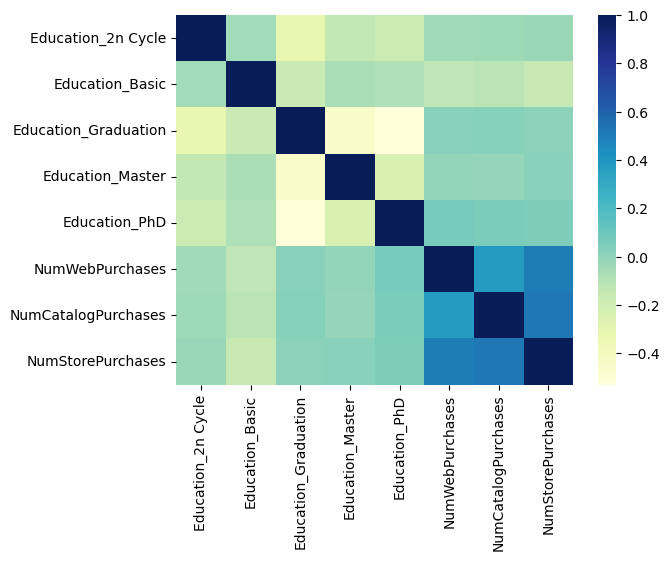

In [24]:
sns.heatmap(df_3.corr(),  cmap= "YlGnBu")

### From this we can see very clearly that those with PHD, masters, and graduation contribute to the most purchases and the ones with basic education contrubute to the least purchases. We can also see most of them prefer web purchases although store and catalog purchases are still plentiful.

In [25]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [26]:
ohetransform2 = ohe.fit_transform(df[['Marital_Status']])

In [27]:
ohetransform2 

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
df = pd.concat([df,ohetransform2], axis = 1)

In [29]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [30]:
df_4 =df[['Marital_Status_Absurd','Marital_Status_Alone','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Marital_Status_Together','Marital_Status_Widow','Marital_Status_YOLO','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',]]

In [31]:
df_4

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,4,6
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,3,7
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,2,5
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,2
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,2,11
2236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,3
2237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,1,5
2238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,4,10


In [32]:
df_4.corr()

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Marital_Status_Absurd,1.000000,-0.001095,-0.010161,-0.023688,-0.015612,-0.017670,-0.005640,-0.000894,-0.006293,0.049488,0.006529
Marital_Status_Alone,-0.001095,1.000000,-0.012448,-0.029019,-0.019125,-0.021646,-0.006909,-0.001095,0.012064,-0.025004,-0.020170
Marital_Status_Divorced,-0.010161,-0.012448,1.000000,-0.269346,-0.177511,-0.200920,-0.064133,-0.010161,0.027594,0.001205,0.003011
Marital_Status_Married,-0.023688,-0.029019,-0.269346,1.000000,-0.413820,-0.468390,-0.149508,-0.023688,0.000896,-0.010047,0.014754
Marital_Status_Single,-0.015612,-0.019125,-0.177511,-0.413820,1.000000,-0.308691,-0.098533,-0.015612,-0.039834,-0.011089,-0.024197
Marital_Status_Together,-0.017670,-0.021646,-0.200920,-0.468390,-0.308691,1.000000,-0.111526,-0.017670,-0.000806,0.002793,-0.009815
Marital_Status_Widow,-0.005640,-0.006909,-0.064133,-0.149508,-0.098533,-0.111526,1.000000,-0.005640,0.036576,0.042780,0.036305
Marital_Status_YOLO,-0.000894,-0.001095,-0.010161,-0.023688,-0.015612,-0.017670,-0.005640,1.000000,0.031369,-0.017001,0.001930
NumWebPurchases,-0.006293,0.012064,0.027594,0.000896,-0.039834,-0.000806,0.036576,0.031369,1.000000,0.378376,0.502713
NumCatalogPurchases,0.049488,-0.025004,0.001205,-0.010047,-0.011089,0.002793,0.042780,-0.017001,0.378376,1.000000,0.518738


<Axes: >

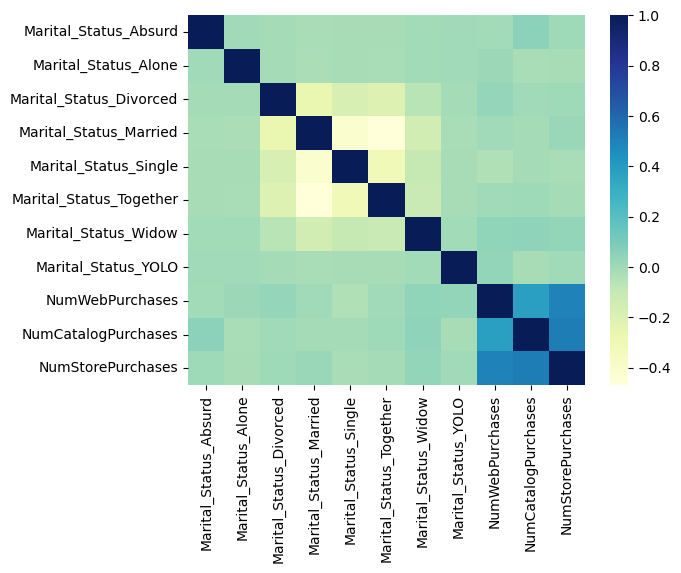

In [47]:
sns.heatmap(df_4.corr(),  cmap= "YlGnBu")

### From this heatmap we can deduce widows tend to purchase the most. The divorced seem to spend a lot through the web. And the absurd martial status group tends to be the ones to spend the most through the catalog.

### It seems the ones with highest income make the most catalog purchases


### From our analysis we have learned:
### Most Web purchases: Divorced, and with Teens
### Most Catalog purchases: Absurd martial status
### Most Store purchases: Those with kids have a negative correlation to buying in store.
### Most purchases in general: Widows, PHD, Masters, and those who graduated


In [57]:
df = pd.read_csv("C:\\Users\\preet\\Documents\\MarketingAnalysis\\superstore_data.csv")

In [62]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


### Creating Webfocusgroup where it will target customers who are divorced and have teens at home

In [195]:
#filtered_df = df.query('Marital_Status == "Divorced"')

Webfocusgroup = df.query('(Marital_Status == "Divorced") & (Teenhome == 1)' )


In [197]:
Webfocusgroup

#Webfocusgroup = df.query('(Marital_Status == "Divorced") & (Kidhome == 1)')

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
17,10175,1958,PhD,Divorced,32173.0,0,1,1/8/2013,0,18,...,0,0,2,1,1,0,3,4,0,0
30,8890,1971,PhD,Divorced,65808.0,1,1,5/30/2014,1,155,...,13,7,10,3,5,1,5,6,0,0
44,5740,1970,2n Cycle,Divorced,25959.0,1,1,2/14/2013,1,4,...,7,5,26,2,1,2,2,6,1,0
48,340,1970,Graduation,Divorced,72967.0,0,1,12/15/2012,1,158,...,0,0,125,2,7,2,8,5,1,0
64,4865,1974,Master,Divorced,53367.0,1,1,8/31/2013,2,229,...,10,3,11,7,5,1,8,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,8602,1964,Graduation,Divorced,69932.0,0,1,12/6/2013,97,412,...,150,105,57,2,7,6,11,4,0,0
2216,7230,1960,PhD,Divorced,50611.0,0,1,4/10/2012,98,459,...,6,0,4,6,4,5,7,6,1,0
2217,5675,1960,PhD,Divorced,50611.0,0,1,4/10/2012,98,459,...,6,0,4,6,4,5,7,6,0,0
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0


### Creates Catalogfocusgroup which will target those who label their martial status as absurd.

In [201]:
Catalogfocusgroup = df.query('Marital_Status == "Absurd"')

In [202]:
Catalogfocusgroup

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
1068,4369,1957,Master,Absurd,65487.0,0,0,10/1/2014,48,240,...,199,0,163,3,3,5,6,2,0,0
1339,7734,1993,Graduation,Absurd,79244.0,0,0,12/19/2012,58,471,...,212,61,245,1,4,10,7,1,1,0


### Creates Storefocusgroup which targets those without kids at home.

In [205]:
Storefocusgroup = df.query('Kidhome == 0')

In [206]:
Storefocusgroup

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,7232,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,2,0,4,2,1,1,3,5,0,0
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


### Creates Totalfocusgroup which focuses on the ones who make the most purchases overall which are those who are widowed and have either Phd, Master, or Graduation as their education.

### First I will filter through education

In [291]:

filter1 = df.query('Education == "PhD" or Education == "Master" or Education == "Graduation"')


In [292]:
filter1

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


### Then I will filter by Marital Status

In [294]:
Totalfocusgroup = filter1.query('Marital_Status == "Widow"')

In [295]:
Totalfocusgroup

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
12,10530,1959,PhD,Widow,67786.0,0,0,7/12/2013,0,431,...,80,20,102,1,3,6,6,1,1,0
28,453,1956,PhD,Widow,35340.0,1,1,6/29/2014,1,27,...,0,1,5,2,2,0,3,5,0,0
76,10352,1963,Graduation,Widow,34213.0,1,1,7/9/2012,2,50,...,6,3,26,3,3,1,2,9,1,0
97,6379,1949,Master,Widow,47570.0,1,1,5/29/2013,3,67,...,0,2,31,3,2,2,2,7,1,0
196,3009,1962,PhD,Widow,71670.0,0,0,9/7/2013,8,1462,...,0,0,160,1,5,3,6,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,123,1951,Graduation,Widow,67046.0,0,1,6/1/2013,92,544,...,23,151,107,2,4,5,4,2,0,0
2189,5441,1965,PhD,Widow,54111.0,0,1,8/25/2013,97,267,...,8,3,50,2,5,2,6,5,0,0
2206,313,1968,Graduation,Widow,73455.0,0,0,10/28/2013,98,901,...,186,163,20,1,6,5,10,3,0,0
2231,8595,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,2,0,4,2,1,1,3,5,0,0


### To conclude based on this analysis the company can choose the right target groups for each of their ad types and the amount of money and labor to be spent behind each one